In [2]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

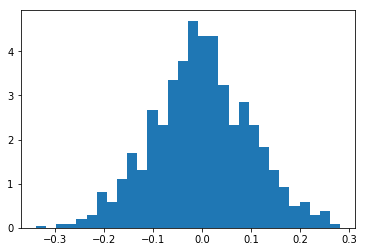

In [5]:
count, bins, ignored = plt.hist(s, 30, density=True)

In [8]:
from sklearn import mixture

In [9]:
gmm = mixture.GaussianMixture()

In [14]:
gmm.fit(s[:,np.newaxis])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
params = gmm.get_params()

In [16]:
params

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 1,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [21]:
gmm.means_

array([[-0.00113133]])

In [22]:
gmm.weights_

array([1.])

In [23]:
gmm.covariances_

array([[[0.00994978]]])

In [24]:
mu, sigma = 40, 15 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [25]:
gmm.fit(s[:,np.newaxis])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
print(gmm.means_)
print(gmm.weights_)
print(gmm.covariances_)

[[40.38839249]]
[1.]
[[[215.28883338]]]


In [27]:
215**0.5

14.66287829861518

In [28]:
s2 = s[:,np.newaxis]
s2.shape

(1000, 1)

In [32]:
t = np.arange(0,100,1)
t = t[:,np.newaxis]

In [39]:
pt = gmm.predict(t)

In [40]:
pt[30:70]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

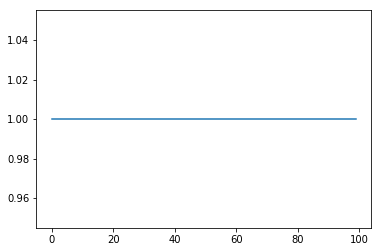

In [35]:
plt.plot(t,pt)

In [41]:
sa = np.random.normal(40,10,1000)
sb = np.random.normal(30,20,300)

In [42]:
s = np.append(sa,sb)

(array([0.00017027, 0.        , 0.        , 0.        , 0.        ,
        0.00017027, 0.00017027, 0.        , 0.0005108 , 0.00102161,
        0.00204321, 0.00153241, 0.00204321, 0.00306482, 0.00459723,
        0.00510803, 0.01328088, 0.01941051, 0.02349694, 0.03081844,
        0.0347346 , 0.03013737, 0.02247533, 0.01191874, 0.00800258,
        0.00306482, 0.00170268, 0.00085134, 0.00017027, 0.00085134]),
 array([-52.22864745, -47.71087328, -43.19309911, -38.67532493,
        -34.15755076, -29.63977659, -25.12200241, -20.60422824,
        -16.08645407, -11.56867989,  -7.05090572,  -2.53313155,
          1.98464263,   6.5024168 ,  11.02019097,  15.53796515,
         20.05573932,  24.57351349,  29.09128767,  33.60906184,
         38.12683601,  42.64461019,  47.16238436,  51.68015853,
         56.19793271,  60.71570688,  65.23348105,  69.75125523,
         74.2690294 ,  78.78680357,  83.30457775]),
 <a list of 30 Patch objects>)

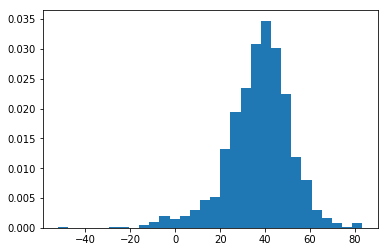

In [43]:
plt.hist(s,30,density=True)

In [45]:
gmm2 = mixture.GaussianMixture(n_components = 2)

In [46]:
gmm2.fit(s[:,np.newaxis])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [49]:
b = np.array([0,1,2,3,4,5])
r = np.zeros(b.shape)
r

array([0., 0., 0., 0., 0., 0.])

In [57]:
def gaussian(x,mu,sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.))) / np.power(2*3.141*np.power(sigma, 2.),0.5)
def multiGaussian(x,mu,sigma):
    result = np.zeros(x.shape)
    for g in range(len(mu)):
        result = np.add(result,gaussian(x,mu[g],sigma[g]))
    return result
def multiGaussianW(x,mu,sigma,w):
    result = np.zeros(x.shape)
    for g in range(len(mu)):
        result = np.add(result,w[g]*gaussian(x,mu[g],sigma[g]))
    return result

In [58]:
gaussian(b,3,1)

array([0.00443227, 0.05399606, 0.24199355, 0.39897992, 0.24199355,
       0.05399606])

mu = [2,4]

In [61]:
mu = [2,4]
sigma = [0.1,1]
multiGaussianW(b,mu,sigma,[1,0])

array([5.52146919e-087, 7.69532451e-022, 3.98979915e+000, 7.69532451e-022,
       5.52146919e-087, 1.47378515e-195])

In [68]:
mu = gmm2.means_
sigma = np.power(gmm2.covariances_,0.5)
w = gmm2.weights_

In [63]:
t.shape

(100, 1)

In [69]:
y = multiGaussianW(t,mu,sigma,w)

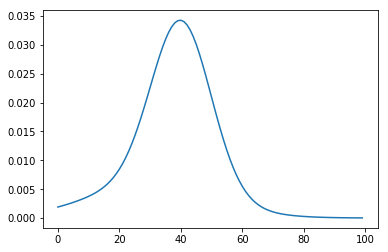

In [70]:
plt.plot(t,y)


In [72]:
sim1 = np.genfromtxt('/Users/Henry/OneDrive/PhD-Folder/GMM data/Sim1.csv',delimiter = ',')

In [76]:
sim1 = sim1[:,np.newaxis]

In [79]:
fs1 = gmm2.fit(sim1)

x = np.arange(np.amin(sim1)-1,np.amax(sim1))

In [90]:
x = np.linspace(np.amin(sim1)-1,np.amax(sim1),100)
x = x[np.newaxis,:]
x.shape

(1, 100)

In [86]:
mu = gmm2.means_
sigma = np.power(gmm2.covariances_,0.5)
w = gmm2.weights_

(array([4.66227412e-01, 1.76331672e-01, 1.28770652e-01, 7.82977333e-02,
        5.17670964e-02, 3.62369675e-02, 2.16774716e-02, 1.81184838e-02,
        1.10005080e-02, 7.76506446e-03, 5.82379835e-03, 3.55898788e-03,
        3.23544353e-03, 4.85316529e-03, 6.47088705e-04, 0.00000000e+00,
        3.23544353e-04, 0.00000000e+00, 0.00000000e+00, 3.23544353e-04,
        0.00000000e+00, 0.00000000e+00, 3.23544353e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.23544353e-04]),
 array([1.27000000e-06, 9.84635343e-01, 1.96926942e+00, 2.95390349e+00,
        3.93853756e+00, 4.92317164e+00, 5.90780571e+00, 6.89243978e+00,
        7.87707386e+00, 8.86170793e+00, 9.84634200e+00, 1.08309761e+01,
        1.18156102e+01, 1.28002442e+01, 1.37848783e+01, 1.47695124e+01,
        1.57541464e+01, 1.67387805e+01, 1.77234146e+01, 1.87080487e+01,
        1.96926827e+01, 2.06773168e+01, 2.16619509e+01, 2.26465850e+01,
        2.36312190e+01

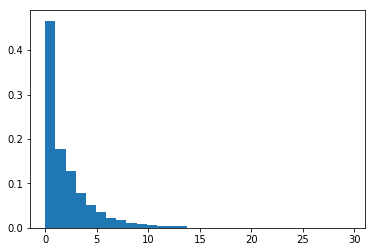

In [87]:
plt.hist(sim1,30,density=True)

In [88]:
y1 = multiGaussianW(x,mu,sigma,w)

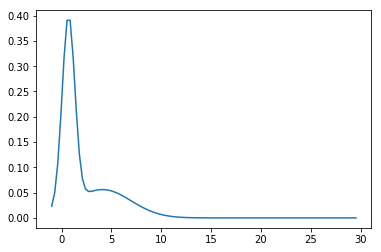

In [94]:
plt.plot(x[0,:],y1[0,:])

In [95]:
logsim1 = np.log(sim1)

In [96]:
fls1 = gmm2.fit(logsim1)

In [100]:
mul = fls1.means_
sigl = np.power(fls1.covariances_,0.5)
wl = fls1.weights_

In [103]:
lx = np.linspace(np.amin(logsim1)-1,np.amax(logsim1),100)
lx = lx[:,np.newaxis]
lx.shape

(100, 1)

In [104]:
y1 = multiGaussianW(lx,mul,sigl,wl)

In [105]:
y1.shape

(100, 1)

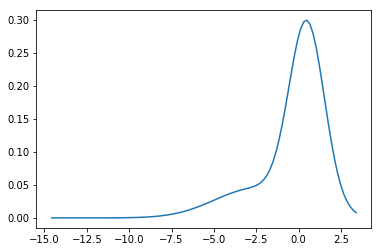

In [106]:
plt.plot(lx,y1)

(array([0.00112688, 0.        , 0.00056344, 0.00169032, 0.00056344,
        0.00112688, 0.0028172 , 0.00225376, 0.00338064, 0.0028172 ,
        0.00507096, 0.00338064, 0.00676128, 0.00957848, 0.01746664,
        0.02141072, 0.02310104, 0.03155264, 0.04507519, 0.07493751,
        0.09634823, 0.10930734, 0.14649438, 0.21128997, 0.25016732,
        0.29749627, 0.2372082 , 0.12621054, 0.03775047, 0.00169032]),
 array([-1.35764937e+01, -1.30110868e+01, -1.24456799e+01, -1.18802731e+01,
        -1.13148662e+01, -1.07494593e+01, -1.01840525e+01, -9.61864562e+00,
        -9.05323876e+00, -8.48783189e+00, -7.92242503e+00, -7.35701817e+00,
        -6.79161131e+00, -6.22620444e+00, -5.66079758e+00, -5.09539072e+00,
        -4.52998386e+00, -3.96457699e+00, -3.39917013e+00, -2.83376327e+00,
        -2.26835641e+00, -1.70294954e+00, -1.13754268e+00, -5.72135819e-01,
        -6.72895656e-03,  5.58677906e-01,  1.12408477e+00,  1.68949163e+00,
         2.25489849e+00,  2.82030536e+00,  3.38571222e+00]

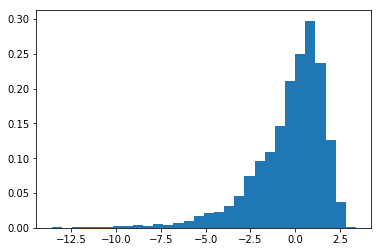

In [107]:
plt.hist(logsim1,30,density=True)

In [108]:
y2 = gmm2.score_samples(lx)

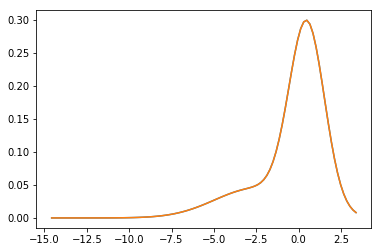

In [111]:
plt.plot(lx,y1,lx,np.exp(y2))

In [113]:
count.shape

(30,)

In [115]:
bins.shape

(31,)

NameError: name 'fit' is not defined